### Set up environment

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def log_discrete_bins(min_value,max_value,bins_if_log_spaced,discretisation):
    # Calculate the bin width on a log axis, for a given minimum value, maximum value and number of bins
    delta_log_i_l_s=(np.log10(max_value)-np.log10(min_value))/bins_if_log_spaced
    # Start at the minimum value (lowest bin edge)
    bin_edges=[min_value]
    prev_edge=min_value
    lstopped=False
    while(lstopped==False):
        log10prev=np.log10(prev_edge)
        # Stop if reached a number greater than the maximum
        if(log10prev>np.log10(max_value)):
            lstopped=True
        else:
            # Find the width of the bin on a linear scale, based on the log spacings calculated above 
            next_delta=10**(log10prev+delta_log_i_l_s)-10**(log10prev)
            # conservative estimate, round bin size to lower number
            next_edge=prev_edge+max(discretisation,discretisation*int(next_delta/discretisation))
            #next_edge = prev_edge+next_delta
            bin_edges.append(next_edge)
            prev_edge=next_edge
    return bin_edges


In [5]:
resolution = '12km'

### Get observations data for overlapping and not overlapping time periods

In [6]:
obs_data_overlap = np.array([])
obs_data_no_overlap = np.array([])

datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/CEH-GEAR/12km/NearestNeighbour/'

for yr in range(1990,2014):
    file_name = datadir + f"{yr}_compressed.npy"
    this_yr = np.load(file_name)
    obs_data_no_overlap =np.append(obs_data_no_overlap, this_yr)
    if yr >=1990 and yr <=2001:
         obs_data_overlap =np.append(obs_data_overlap, this_yr)

### Get model data for overlapping and not overlapping time periods

In [7]:
ems = ['01', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '15']

model_data_overlap = np.array([])
model_data_no_overlap = np.array([])
for em in ems:
    print(em)
    datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_hourly/2.2km_regridded_12km/1980_2001/{em}/'
    for yr in range(1981,2001):
        file_name = datadir + f"compressed_{yr}.npy"
        this_yr = np.load(file_name)
        model_data_no_overlap =np.append(model_data_no_overlap, this_yr)
        if yr >=1990 and yr <=2001:
            model_data_overlap =np.append(model_data_overlap, this_yr)

01
04
05
06
07
08
09
10
11
12
13
15


## Calculate CDFs and CCDFs

In [110]:
bins_i_want =  [0.05, 0.1, 0.5,2, 3, 7, 10,15, 21, 35,60, 70, 78,1000]
low_bins_i_want = [0.95, 1.05, 1.15]
bin_num = len(bins_i_want)-1

In [115]:
# Create patches
patches= []
patch1 = mpatches.Patch(color= 'black', label='CEH-GEAR')
patch2 = mpatches.Patch(color= 'darkorange', label='UKCP18')
patches.append(patch1)
patches.append(patch2)

### Why is this not going betwen 0 and 1?

In [177]:
# model_data_no_overlap = model_data_no_overlap[~np.isnan(model_data_no_overlap)]
# # Keep only wet values 
# model_data_no_overlap = model_data_no_overlap[model_data_no_overlap >= 0.1]

obs_data_no_overlap = obs_data_no_overlap[~np.isnan(obs_data_no_overlap)]
# Keep only wet values 
obs_data_no_overlap = obs_data_no_overlap[obs_data_no_overlap >= 0.1]

In [178]:
values = model_data_no_overlap
values_obs = obs_data_no_overlap

In [173]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming this_yr is your data array
# values_sorted = np.sort(model_data_no_overlap)
# cdf = np.arange(1, len(this_yr) + 1) / len(this_yr)

# # Plot the CDF directly
# plt.plot(values_sorted, cdf, marker='o', linestyle='-')

# # Add labels and title
# plt.xlabel('Value')
# plt.ylabel('CDF')
# plt.title('Cumulative Distribution Function')

# # Show the plot
# plt.grid(True)
# plt.show()


In [189]:
np.nanmin(values_obs)

0.10000000149011612

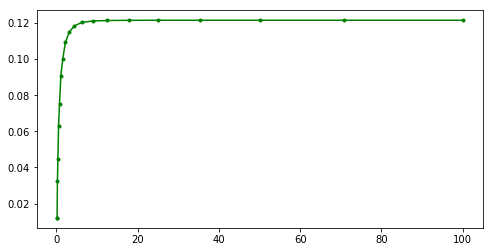

In [187]:
# Specify logarithmically spaced bin edges
bin_edges = np.logspace(np.log10(0.1), np.log10(100), 21)

fig, ax = plt.subplots(figsize=(8, 4))

# Calculate the histogram and CDF
# counts, bin_edges = np.histogram(values, bins=bin_edges)
# cdf = np.cumsum(counts) / len(values)
# ccdf = 1-cdf
# # Plot the CDF with logarithmic x-axis
# #plt.figure(facecolor='white')
# ax.plot(bin_edges[1:], cdf, marker='.', linestyle='-', color='blue')

# # Calculate the histogram and CDF
counts, bin_edges = np.histogram(values_obs, bins=bin_edges)
cdf = np.cumsum(counts) / len(values)
# ccdf = 1-cdf
# # Plot the CDF with logarithmic x-axis
# #plt.figure(facecolor='white')
ax.plot(bin_edges[1:], cdf, marker='.', linestyle='-', color='green')

# # plt.title('Cumulative Distribution Function (CDF)')
# # plt.xlabel('Value')
# # plt.ylabel('CDF')
# # plt.grid(True)
# # plt.show()

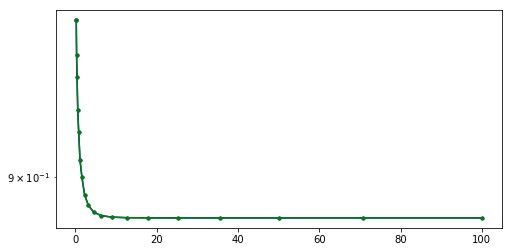

In [183]:
fig, ax = plt.subplots(figsize=(8, 4))

# Calculate the histogram and CDF
# Plot the CDF with logarithmic x-axis
#plt.figure(facecolor='white')
ax.plot(bin_edges[1:], ccdf, marker='.', linestyle='-', color='blue')

# Calculate the histogram and CDF
#plt.figure(facecolor='white')
ax.plot(bin_edges[1:], ccdf, marker='.', linestyle='-', color='green')

ax.set_yscale('log')  # Set x-axis to logarithmic scale
# plt.title('Cumulative Distribution Function (CDF)')
# plt.xlabel('Value')
# plt.ylabel('CDF')
# plt.grid(True)
# plt.show()

In [171]:
colors = ['red', 'green']
fig, ax = plt.subplots(figsize=(8, 4))
bins_ccdf_ls = []
bins_cdf_ls = []
ns_ccdf_ls=[]
ns_cdf_ls=[]

bin_edges_planned = np.logspace(np.log10(0.1), np.log10(100), 21)

for num, data in enumerate([obs_data_overlap, model_data_overlap]):

    # Get the cumulative histogram data
    n_model, bins, patches = plt.hist(data, bin_edges_planned, density=True, histtype='step',
                               cumulative=True, label='Empirical')
    ns_cdf_ls.append(n_model)
    bins_cdf_ls.append(bins)
   
    # Get the reversed cumulative histogram data
    n, bins_ccdf, _ = plt.hist(data, bins=bins, density=True, histtype='step', cumulative=-1)
    
    # Plot as a line
    ax.plot(bins[:-1], n, marker='o', linestyle='-', color = colors[num])

    # Add labels and title
    ax.set_xlabel('Value')
    ax.set_ylabel('Cumulative Frequency')
    ax.set_title('Cumulative Histogram')
    ax.set_yscale('log')
    bins_ccdf_ls.append(bins_ccdf)
    ns_ccdf_ls.append(n)
    
plt.close()

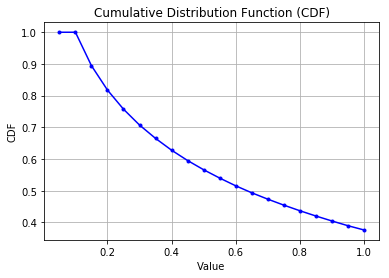

In [151]:
# Plot the CDF
plt.figure(facecolor='white')
plt.plot(bin_edges[1:], reverse_cdf, marker='.', linestyle='-', color='blue')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Value')
plt.ylabel('CDF')
plt.grid(True)
plt.show()

0
1


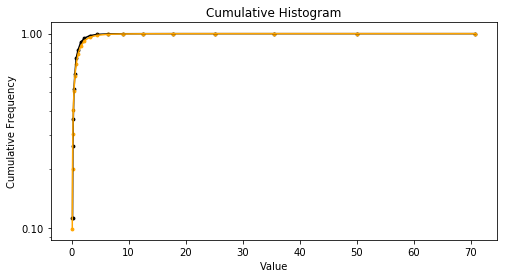

In [165]:
fig, ax = plt.subplots(figsize=(8, 4))
cols = ['black', 'orange']
for i in range(0,2):
    print(i)
    # Plot as a line
    bins = bins_cdf_ls[i]
    n = ns_cdf_ls[i]
    ax.plot(bins[:-1], n,linestyle='-', color = cols[i])
    ax.scatter(bins[:-1], n, linestyle='-', linewidth= 1, s=8, color = cols[i])
    
    # Add labels and title
    ax.set_xlabel('Value')
    ax.set_ylabel('Cumulative Frequency')
    ax.set_title('Cumulative Histogram')
    ax.set_yscale('log')
    #ax.set_ylim(1e-8,5)
    # Show plot

formatter = ticker.ScalarFormatter(useMathText=False, useOffset=False)
formatter.set_scientific(False)
formatter.set_powerlimits((-2, 2))  # Adjust as needed
plt.gca().get_yaxis().set_major_formatter(formatter)    

plt.show()

0
1


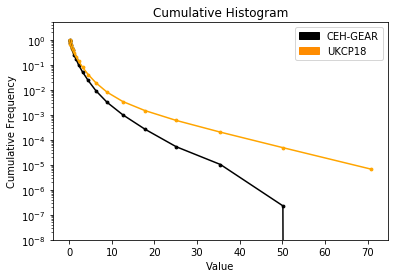

In [170]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(6, 4))
cols = ['black', 'orange']
for i in range(0,2):
    print(i)
    # Plot as a line
    bins = bins_ccdf_ls[i]
    n = ns_ccdf_ls[i]
    ax.plot(bins[:-1], n,linestyle='-', color = cols[i])
    ax.scatter(bins[:-1], n, linestyle='-', linewidth= 1, s=8, color = cols[i])
    
    # Add labels and title
    ax.set_xlabel('Value')
    ax.set_ylabel('Cumulative Frequency')
    ax.set_title('Cumulative Histogram')
    ax.set_yscale('log')
    ax.set_ylim(1e-8,5)

# Create patches
patches= []
patch1 = mpatches.Patch(color= 'black', label='CEH-GEAR')
patch2 = mpatches.Patch(color= 'darkorange', label='UKCP18')
patches.append(patch1)
patches.append(patch2)    
ax.legend(handles=patches);    
# formatter = ticker.ScalarFormatter(useMathText=False, useOffset=False)
# formatter.set_scientific(False)
# formatter.set_powerlimits((-5, 5))  # Adjust as needed
# plt.gca().get_yaxis().set_major_formatter(formatter)    
    
# plt.gca().get_yaxis().set_major_formatter(ticker.ScalarFormatter(useMathText=False))
# plt.ticklabel_format(axis='y', style='plain')
    # Show plot
plt.show()

/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


ValueError: max must be larger than min in range parameter.

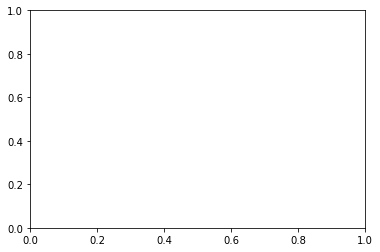

In [12]:
#!/usr/bin/env python
# Steven Boeing, 2020
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# EXAMPLE CODES REGARDING PROBABILITY DISTRIBUTION FUNCTION
# AND CUMULATIVE DISTRIBUTION FUNCTION PLOTTING 

# SMALL NOTES
# 1) This shows some possibilities for plotting, but there are more
# possibilities (e.g. a weighted cumulative distribution function).
# 2) I may want to add something about handling of zero/small values in the
# normalisation procedure at some point. It is something to think about,
# see Nikolina Ban's work.
# 3) I think numpy.histogram and mpl.hist handle numbers that are exactly
# on a bin edge sligthly differently, and it is still possible to improve
# the handling of cases where not all the numbers are in a bin.

# RANDOM NUMBER GENERATION FOR PLOTS
# The seed function is used to make sure you draw the same 'random' 
# numbers each time.
# Draw numbers from a lognormal and from a beta distribution, 
# combine these into a single array
draws_in_each_distribution=10000
np.random.seed(21)
lognormal_numbers=np.random.lognormal(mean=0.3, sigma=1.0, size=draws_in_each_distribution)
beta_numbers=np.random.lognormal(mean=0.3, sigma=0.5, size=draws_in_each_distribution)
combined_numbers==np.concatenate((lognormal_numbers,beta_numbers))
total_nr_draws=len(combined_numbers)

# PARAMETERS FOR PLOTTING HISTOGRAMS
# Parameters to generate bins with unequal spacing
# We use an approach based on the N-th power here 
# (advantage over logarithmic spacing: easy to handle near-zero values)
# An alternative is to use a logarithmmic spacing (see lower down)
number_many_linear_bins=200 # Number of bins for improved plots with equal bins
power_for_unequal_bins=3.0 # Power used for generating unequal bins
number_unequal_bins=40 # Number of unequal bins 
unequal_min=0. # Must be zero or bigger for this approach to work
unequal_max=1.01*np.nanmax(combined_numbers) # Ensure this is greater than the largest number
# N-th root (e.g. third root) of bin edges for manual bin edge spacing
unequal_linspace=np.linspace(unequal_min,unequal_max**(1.0/power_for_unequal_bins),number_unequal_bins) 
unequal_bin_edges=unequal_linspace**power_for_unequal_bins
# This piece of codes calculates the bin centres, based on the third root
# Alternative choice would be: power_bin_centres=0.5*(unequal_bin_edges[:-1]+unequal_bin_edges[1:])
unequal_linspace_centres=0.5*(unequal_linspace[:-1]+unequal_linspace[1:])
unequal_bin_centres=(unequal_linspace_centres)**3

# BEFORE PLOTTING, CHECK MATPLOTLIB VERSION JUST TO SEE WE CAN PLOT EVERYTHING
# USING TUPLES TO AVOID DEPENDECY ON PACKAGES
def versiontuple(v):
    return tuple(map(int, (v.split("."))))
    
if (versiontuple(mpl.__version__)<versiontuple("2.0.0")):
    print ('Error: density histograms need a version of matplotlib>2.0.0')
    print ('You may want to set up and activate an appropriate anaconda environment')
    quit()
    
# SIMPLE HISTOGRAMS
plt.hist(combined_numbers)
plt.title('simple histogram with few bins (take note of y-axis maximum)')
plt.xlabel('bin value')
plt.ylabel('counts per bin')
plt.show()

plt.hist(combined_numbers,bins=200)
plt.title(str(number_many_linear_bins)+' bins (fewer counts per bin)')
plt.xlabel('bin value')
plt.ylabel('counts per bin')
plt.show()

# Shows hit-and-miss behaviour for higher values
plt.hist(combined_numbers,bins=200)
plt.title(str(number_many_linear_bins)+' bins, zooming in on the higher values')
plt.xlabel('bin value')
plt.ylabel('counts per bin')
plt.ylim(0,20)
plt.show()

plt.hist(combined_numbers,bins=unequal_bin_edges)
plt.title('using unequal bin widths, the curve becomes smoother')
plt.xlabel('bin value')
plt.ylabel('counts per bin')
plt.show()

# INTRODUCING THE DENSITY ARGUMENT
# Motivation
plt.hist(combined_numbers,bins=200,histtype='step')
plt.hist(combined_numbers,bins=unequal_bin_edges,histtype='step')
plt.legend((str(number_many_linear_bins)+' equal bins',str(number_unequal_bins)+' unequal bins'))
plt.title('caution: unequal bins influence shape of the curve (histtype=\'step\')')
plt.xlabel('bin value')
plt.ylabel('counts per bin')
plt.show()

plt.hist(combined_numbers,histtype='step',density=True)
plt.hist(combined_numbers,bins=200,histtype='step',density=True)
plt.hist(combined_numbers,bins=unequal_bin_edges,histtype='step',density=True)
plt.legend(('few bins',str(number_many_linear_bins)+' equal bins',str(number_unequal_bins)+' unequal bins'))
plt.title('use \'density\' argument to normalise y-axis (area under each curve is 1)')
plt.xlabel('bin value')
plt.ylabel('density of counts (area under curve is 1)')
plt.ylim(0,0.6)
plt.show()

plt.hist(combined_numbers,histtype='step',density=True)
plt.hist(combined_numbers,bins=200,histtype='step',density=True)
plt.hist(combined_numbers,bins=unequal_bin_edges,histtype='step',density=True)
plt.legend(('few bins',str(number_many_linear_bins)+' equal bins',str(number_unequal_bins)+' unequal bins'))
plt.title('zooming in on the distributions with the \'density\' argument')
plt.xlabel('bin value')
plt.ylabel('density of counts (area under curve is 1)')
plt.ylim(0,0.01)
plt.show()


In [ ]:

# NUMPY CALCULATIONS OF HISTOGRAM
# Use extended arrays to get edges right using matplotlib.pyplot.step
# Check manual plots against matplotlib.pyplot.hist
# In the examples below, the 'where' argument is added explicitly
# For the cumulative distribution functions, add extra bin equal to last value
def extend_histogram(values,bin_edges,cumulative=False):
    if cumulative==True:
        return np.concatenate(([0.0],values,[values[-1]])),np.concatenate((bin_edges,[bin_edges[-1]]))      
    else:
        return np.concatenate(([0.0],values,[0.0])),np.concatenate((bin_edges,[bin_edges[-1]]))
    
unequal_density,bins_out=np.histogram(combined_numbers,bins=unequal_bin_edges,density=True)
unequal_density_extended,unequal_bin_edges_extended=extend_histogram(unequal_density,unequal_bin_edges)

# PLOTS TO CHECK MANUALLY PLOTTED HISTOGRAMS AGAINST MATPLOTLIB ONES
plt.plot(unequal_bin_centres,unequal_density)
plt.step(unequal_bin_edges_extended,unequal_density_extended,where='pre') 
plt.hist(combined_numbers,bins=unequal_bin_edges,density=True)
plt.legend(('plotted as lines','plotted as steps','plotted with matplotlib'))
plt.title('you can plot as lines as well (needs some more code)')
plt.xlabel('bin value')
plt.ylabel('density of counts (area under curve is 1)')
plt.xlim(-0.003*np.nanmax(combined_numbers),np.nanmax(combined_numbers))
plt.ylim(0,0.6)
plt.show()

plt.plot(unequal_bin_centres,unequal_density)
plt.step(unequal_bin_edges_extended,unequal_density_extended,where='pre')
plt.hist(combined_numbers,bins=unequal_bin_edges,density=True)
plt.legend(('plotted as lines','plotted as steps','plotted with matplotlib'))
plt.title('zooming in on smaller values')
plt.xlabel('bin value')
plt.ylabel('density of counts (area under curve is 1)')
plt.xlim(-0.003*np.nanmax(combined_numbers),np.nanmax(combined_numbers))
plt.ylim(0,0.01)
plt.show()

# For the logarithmic plots, add scatterplot option
# Drawback of this plot is that the area under the curve no longer
# corresponds to anything
plt.plot(unequal_bin_centres,unequal_density)
plt.step(unequal_bin_edges_extended,unequal_density_extended,where='pre')
plt.scatter(unequal_bin_centres,unequal_density)
plt.hist(combined_numbers,bins=unequal_bin_edges,density=True)
plt.legend(('plotted as lines','plotted as steps','plotted as scatterplot','plotted with matplotlib'))
plt.title('using a y log-axis')
plt.xlabel('bin value')
plt.ylabel('density of counts (log axis)')
plt.gca().set_yscale('log')
plt.xlim(-0.003*np.nanmax(combined_numbers),np.nanmax(combined_numbers))
plt.ylim(1e-5,1.0)
plt.show()

plt.plot(unequal_bin_centres,unequal_density)
plt.step(unequal_bin_edges_extended,unequal_density_extended,where='pre')
plt.scatter(unequal_bin_centres,unequal_density)
plt.hist(combined_numbers,bins=unequal_bin_edges,density=True)
plt.legend(('plotted as lines','plotted as steps','plotted as scatterplot','plotted with matplotlib'))
plt.title('using two log axes')
plt.xlabel('bin value (log axis)')
plt.ylabel('density of counts (log axis)')
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlim(1e-3,np.nanmax(combined_numbers))
plt.ylim(1e-5,1.0)
plt.show()

# CUMULATIVE HISTOGRAM PLOTTING
# Including manual normalisation
# Extended arrays used to make cdf go from 0 to non-zero at first value in line plot
# Another (nicer) way to create cdfs involves sorting the array to obtain relative ranks
# this is also demonstrated
unequal_counts,bins_out=np.histogram(combined_numbers,bins=unequal_bin_edges) 
unequal_cumulative=np.cumsum(unequal_counts)/(1.0*total_nr_draws)
unequal_cumulative_extended,unequal_bin_edges_extended=extend_histogram(unequal_cumulative,unequal_bin_edges,cumulative=True)
sorted_numbers = np.sort(combined_numbers)
sorted_numbers_extended=np.concatenate(([sorted_numbers[0]],sorted_numbers)) # repeat first number as zero entry
relative_ranks=np.arange(total_nr_draws+1.0)/(1.0*total_nr_draws)
exceedance_ranks=1.0-relative_ranks

plt.plot(unequal_bin_edges_extended,unequal_cumulative_extended)
plt.step(unequal_bin_edges_extended,unequal_cumulative_extended,where='pre')
plt.hist(combined_numbers,bins=unequal_bin_edges,cumulative=True,density=True)
plt.legend(('plotted as lines','plotted as steps','plotted with matplotlib'))
plt.title('instead of pdfs, plot cumulative distributions (lines meet at right of bar)')
plt.xlabel('bin value')
plt.ylabel('fraction of contributions below bin value')
plt.xlim(-0.003*np.nanmax(combined_numbers),np.nanmax(combined_numbers))
plt.ylim(0,1.0)
plt.show()

plt.plot(sorted_numbers_extended,relative_ranks)
plt.hist(combined_numbers,bins=unequal_bin_edges,cumulative=True,density=True)
plt.legend(('plotted as lines','plotted with matplotlib'))
plt.title('nicer cdfs can be obtained using a sorting approach')
plt.xlabel('bin value')
plt.ylabel('fraction of contributions below bin value')
plt.xlim(-0.003*np.nanmax(combined_numbers),np.nanmax(combined_numbers))
plt.ylim(0,1.0)
plt.show()

plt.plot(sorted_numbers_extended,exceedance_ranks)
plt.title('probability of exceedance (1-cdf value)')
plt.xlabel('bin value')
plt.ylabel('probability of exceedance')
plt.xlim(-0.003*np.nanmax(combined_numbers),np.nanmax(combined_numbers))
plt.ylim(0,1.0)
plt.show()

plt.plot(sorted_numbers_extended,exceedance_ranks)
plt.scatter(sorted_numbers_extended,exceedance_ranks)
plt.legend(('plotted as lines','plotted as a scatterplot'))
plt.title('using a y-log axis')
plt.xlabel('bin value')
plt.ylabel('probability of exceedance')
plt.gca().set_yscale('log')
plt.xlim(-0.003*np.nanmax(combined_numbers),np.nanmax(combined_numbers))
plt.ylim(1e-5,1.0)
plt.show()

# WEIGHTED DENSITY HISTOGRAMS
# Rather than probability in each bin, these show the contribution to the
# sum of the numbers corresponding to each bin.
weighted_density,bins_out=np.histogram(combined_numbers,bins=unequal_bin_edges,density=True,weights=combined_numbers)
weighted_density_extended,unequal_bin_edges_extended=extend_histogram(weighted_density,unequal_bin_edges)
  
plt.plot(unequal_bin_centres,weighted_density)
plt.step(unequal_bin_edges_extended,weighted_density_extended,where='pre')
plt.hist(combined_numbers,bins=unequal_bin_edges,density=True,weights=combined_numbers)
plt.legend(('plotted as lines','plotted as steps','plotted with matplotlib'))
plt.title('weight the pdf by \'contribution\' to emphasize high bin values')
plt.xlabel('bin value')
plt.ylabel('density of contributions (area under curve is 1)')
plt.xlim(-0.003*np.nanmax(combined_numbers),np.nanmax(combined_numbers))
plt.ylim(0,0.35)
plt.show()

# PLOTS WITH LOGARITHMIC BINS
# formatting for powers of two
def format_log2(value, tick_number):
    N = 2.0**value
    return r"${0}$".format(N)
    
log_bins=40
log_bins_min=-5.
log_bins_max=8
log_bins_linspace=np.linspace(log_bins_min,log_bins_max,log_bins)
log_bins_centres=0.5*(log_bins_linspace[:-1]+log_bins_linspace[1:])
log_weighted_density,bins_out=np.histogram(np.log2(combined_numbers),bins=log_bins_linspace,density=True,weights=combined_numbers)
log_weighted_density_extended,log_bin_edges_extended=extend_histogram(log_weighted_density,log_bins_linspace)
    
plt.plot(log_bins_centres,log_weighted_density)
plt.step(log_bin_edges_extended,log_weighted_density_extended,where='pre') 
plt.legend(('plotted as lines','plotted as steps'))
plt.title('log x-axis and logarithmic bins (area below curve scales with contribution)')
plt.ylim(0,0.5)
plt.xlim(log_bins_min,log_bins_max)
plt.xticks(np.log2([0.125,0.25,0.5,1,2,4,8,16,32,64]))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_log2))
plt.xlabel('bin value')
plt.ylabel('density of contributions/doubling')
plt.show()

# GENERATE A SECOND DISTRIBUTION
lognormal_numbers_new=np.random.lognormal(mean=0.4, sigma=1.2, size=draws_in_each_distribution)
beta_numbers_new=np.random.lognormal(mean=0.4, sigma=0.6, size=draws_in_each_distribution)
combined_numbers_new=np.concatenate((lognormal_numbers_new,beta_numbers_new))
log_weighted_density_new,bins_out=np.histogram(np.log2(combined_numbers_new),bins=log_bins_linspace,density=True,weights=combined_numbers_new)

# NORMALISED TO HAVE EQUAL AREA UNDER CURVE (AREA IS 1 IF THE "DISTANCE" FOR EACH DOUBLING IS REGARDED AS 1)
plt.plot(log_bins_centres,log_weighted_density)
plt.plot(log_bins_centres,log_weighted_density_new)
plt.legend(('old normalised to unity','new normalised to unity'))
plt.title('similar plot for two different distributions (equal area under curve)')
plt.xlabel('bin value')
plt.ylabel('density of contributions/doubling')
plt.xticks(np.log2([0.125,0.25,0.5,1,2,4,8,16,32,64]))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_log2))
plt.xlim(log_bins_min,log_bins_max)
plt.ylim(0,0.5)
plt.show()

# NORMALISED TO HAVE AREA UNDER CURVE EQUAL TO SUM OF NUMBERS
# For precipitation, this plot has the advantage that it displays both:
# - How the probability and amount of at a given rate (e.g. 30 mm/hr rainfall) changes (both scale as curve height at 30 mm/hr)
# - How the amount of rainfall above a threshold rate (e.g. 30 mm/hr) changes (scales as area of curve above 30 mm/hr)
plt.plot(log_bins_centres,sum(combined_numbers)*log_weighted_density)
plt.plot(log_bins_centres,sum(combined_numbers_new)*log_weighted_density_new)
plt.legend(('old normalised to total','new normalised to total'))
plt.title('better normalisation: area under the curve proportional to total')
plt.xlabel('bin value')
plt.ylabel('total contribution/doubling')
plt.xticks(np.log2([0.125,0.25,0.5,1,2,4,8,16,32,64]))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_log2))
plt.xlim(log_bins_min,log_bins_max)
plt.ylim(0,1.5*np.nanmax(sum(combined_numbers_new)*log_weighted_density_new))
plt.show()


In [69]:
number_many_linear_bins=200 # Number of bins for improved plots with equal bins
power_for_unequal_bins=3.0 # Power used for generating unequal bins
number_unequal_bins=40 # Number of unequal bins 
unequal_min=0. # Must be zero or bigger for this approach to work
unequal_max=1.01*np.nanmax(combined_numbers) # Ensure this is greater than the largest number
# N-th root (e.g. third root) of bin edges for manual bin edge spacing
unequal_linspace=np.linspace(unequal_min,unequal_max**(1.0/power_for_unequal_bins),number_unequal_bins) 
unequal_bin_edges=unequal_linspace**power_for_unequal_bins
# This piece of codes calculates the bin centres, based on the third root
# Alternative choice would be: power_bin_centres=0.5*(unequal_bin_edges[:-1]+unequal_bin_edges[1:])
unequal_linspace_centres=0.5*(unequal_linspace[:-1]+unequal_linspace[1:])
unequal_bin_centres=(unequal_linspace_centres)**3
total_nr_draws=len(combined_numbers)

In [71]:
unequal_counts,bins_out=np.histogram(combined_numbers,bins=unequal_bin_edges) 
unequal_cumulative=np.cumsum(unequal_counts)/(1.0*total_nr_draws)
unequal_cumulative_extended,unequal_bin_edges_extended=extend_histogram(unequal_cumulative,unequal_bin_edges,cumulative=True)
sorted_numbers = np.sort(combined_numbers)
sorted_numbers_extended=np.concatenate(([sorted_numbers[0]],sorted_numbers)) # repeat first number as zero entry
relative_ranks=np.arange(total_nr_draws+1.0)/(1.0*total_nr_draws)
exceedance_ranks=1.0-relative_ranks

plt.plot(unequal_bin_edges_extended,unequal_cumulative_extended)
plt.step(unequal_bin_edges_extended,unequal_cumulative_extended,where='pre')
plt.hist(combined_numbers,bins=unequal_bin_edges,cumulative=True,density=True)
plt.legend(('plotted as lines','plotted as steps','plotted with matplotlib'))
plt.title('instead of pdfs, plot cumulative distributions (lines meet at right of bar)')
plt.xlabel('bin value')
plt.ylabel('fraction of contributions below bin value')
plt.xlim(-0.003*np.nanmax(combined_numbers),np.nanmax(combined_numbers))
plt.ylim(0,1.0)
plt.show()

plt.plot(sorted_numbers_extended,relative_ranks)
plt.hist(combined_numbers,bins=unequal_bin_edges,cumulative=True,density=True)
plt.legend(('plotted as lines','plotted with matplotlib'))
plt.title('nicer cdfs can be obtained using a sorting approach')
plt.xlabel('bin value')
plt.ylabel('fraction of contributions below bin value')
plt.xlim(-0.003*np.nanmax(combined_numbers),np.nanmax(combined_numbers))
plt.ylim(0,1.0)
plt.show()

plt.plot(sorted_numbers_extended,exceedance_ranks)
plt.title('probability of exceedance (1-cdf value)')
plt.xlabel('bin value')
plt.ylabel('probability of exceedance')
plt.xlim(-0.003*np.nanmax(combined_numbers),np.nanmax(combined_numbers))
plt.ylim(0,1.0)
plt.show()

plt.plot(sorted_numbers_extended,exceedance_ranks)
plt.scatter(sorted_numbers_extended,exceedance_ranks)
plt.legend(('plotted as lines','plotted as a scatterplot'))
plt.title('using a y-log axis')
plt.xlabel('bin value')
plt.ylabel('probability of exceedance')
plt.gca().set_yscale('log')
plt.xlim(-0.003*np.nanmax(combined_numbers),np.nanmax(combined_numbers))
plt.ylim(1e-5,1.0)
plt.show()

NameError: name 'unequal_bin_edges_extended' is not defined

### Plot for each ensemble member separately